Part 1: build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic
Regression Model with the best performance possible (deliverable: Notebook)

In [28]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [6]:
#import dataset
data = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')
#explore data
display(data.head())
display(data.info())
display(data.describe())
#finding missing value
display(data.isnull().sum())
#slice independent (X) and depedent (t) variables
X = data.iloc[:, 1:].values
t = data.iloc[:, 0].values

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


None

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [7]:
#split dataset into data training75% and testing25%
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.25, random_state = 101)
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#grid searching key hyperparametres
#define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
#define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.691764 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.691764 (0.025255) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.681171 (0.026677) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690942 (0.024495) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.691764 (0.025255) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.680862 (0.025179) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690943 (0.024963) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.691764 (0.025070) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.679938 (0.027130) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.687446 (0.025991) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.690839 (0.025125) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.681993 (0.026809) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.682608 (0.024753) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.687544 (0.022415) wit

In [11]:
# Training the Logistic Regression model with best performance
classifier = LogisticRegression(random_state = 101,C =100,penalty='l2',solver='newton-cg')
classifier.fit(X_train, t_train)

LogisticRegression(C=100, random_state=101, solver='newton-cg')

Part 2: Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk (deliverable: Notebook)

In [12]:
#sorted in order of decreasing influence on the CVD Risk
results = []
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
        results.append([v])
importance_df = pd.DataFrame(results, columns=["Score"])
importance_df.sort_values(by="Score",ascending=False)
	#print('Feature: %0d, Score: %.5f' % (i,v))

,Score
6,1.129536
2,0.199734
11,0.135913
14,0.115781
10,0.065354
12,0.052602
8,0.007421
0,-0.005970
9,-0.042787
13,-0.091538


In [13]:
# feature importance
importance_df

,Score
0,-0.005970
1,-0.305473
2,0.199734
3,-0.126089
4,-0.612354
5,-0.199982
6,1.129536
7,-0.204974
8,0.007421
9,-0.042787


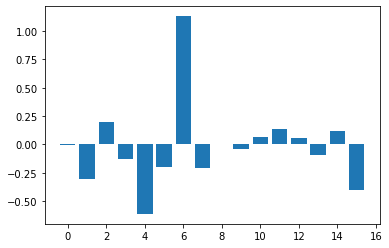

In [15]:
#plot feature importance in an original order
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Part 3: Evaluate the performance of your model (including ROC Curve), explain the performance and
draw a meaningful conclusion. (deliverable: Performance outputs in Notebook, explanation and
conclusion in Word/PDF document)

In [17]:
#Confusion Matrix
t_pred=classifier.predict(X_test)
cm = confusion_matrix(t_test, t_pred)
print(cm)

#TN FP
#FN TP

[[174 177]
 [ 67 393]]


In [23]:
print(classification_report(t_test, t_pred))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59       351
           1       0.69      0.85      0.76       460

    accuracy                           0.70       811
   macro avg       0.71      0.68      0.68       811
weighted avg       0.70      0.70      0.69       811



In [24]:
#Accuracy, precision,recal, f-1 score
print('accuracy: {}'.format(accuracy_score(t_test, t_pred)))
precision, recall, fscore, support = score(t_test, t_pred,average='binary')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

accuracy: 0.6991368680641183
precision: 0.6894736842105263
recall: 0.8543478260869565
fscore: 0.7631067961165049


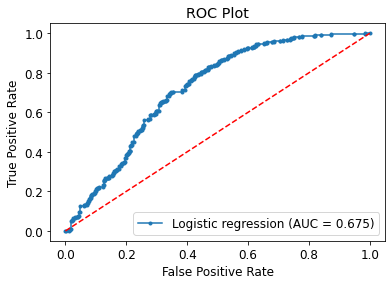

In [25]:
#prediction probabilities 
lr_probs = classifier.predict_proba(X_test)# y-test
#probabilities for the positive outcome is kept
lr_probs = lr_probs[:, 1]
#calculate ROC score
lr_auc = roc_auc_score(t_test,t_pred)
# Calculate ROC curve
lr_fpr, lr_tpr, _ = roc_curve(t_test, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression (AUC = %0.3f)' % lr_auc)
plt.plot([0, 1], [0, 1],'r--')
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

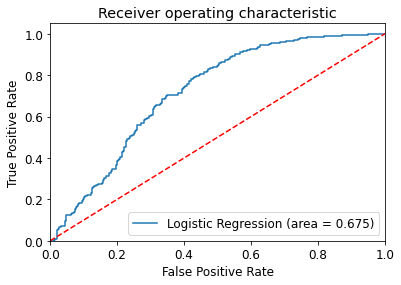

In [27]:
# ROC Curve
logit_roc_auc = roc_auc_score(t_test, t_pred)
fpr, tpr, thresholds = roc_curve(t_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

0.675037160906726


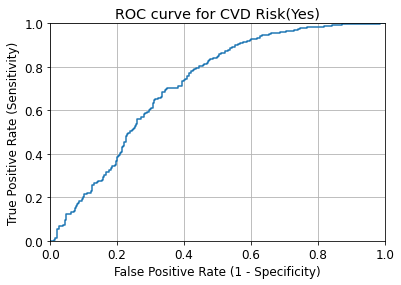

In [30]:
#ROC Curve
print(metrics.roc_auc_score(t_test, t_pred))
fpr, tpr, thresholds = metrics.roc_curve(t_test, t_pred)
probas_pred = classifier.predict_proba(X_test)
probas_pred = probas_pred[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(t_test, probas_pred)
plt.plot(lr_fpr, lr_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for CVD Risk(Yes)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [31]:
from IPython.display import Image  
!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus